# Name : Saana Dhabekar
# Roll NO : 19
# Branch : Data Science
# Section : B

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1) SIFT

In [39]:
def sift_feature_matching(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2_gray, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    img_matches = cv2.drawMatches(img1_rgb, keypoints1, img2_rgb, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.axis("off")
    plt.show()

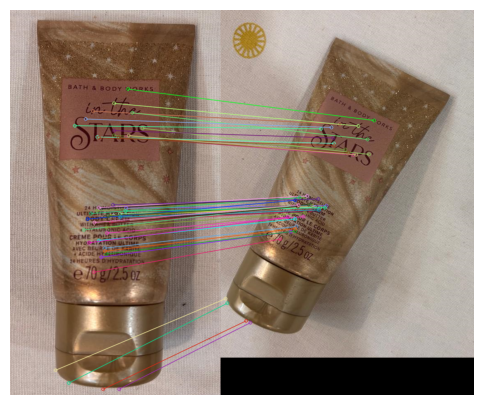

In [40]:
sift_feature_matching("img1.png", "img2.png")

## 2) HARRIS CORNER

In [41]:
def harris_corner_detection(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst = cv2.cornerHarris(gray, 12, 3, 0.04)
    dst = cv2.dilate(dst, None)
    img[dst > 0.01 * dst.max()] = [0, 255,0 ]
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

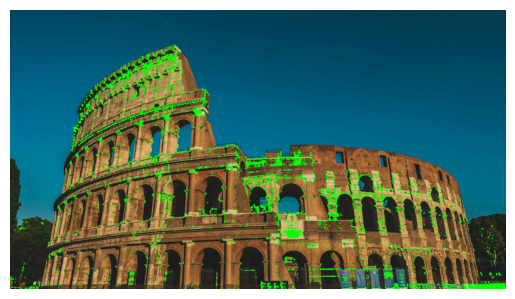

In [42]:
harris_corner_detection("img3.jpg")

## 3) Shi-Tomasi

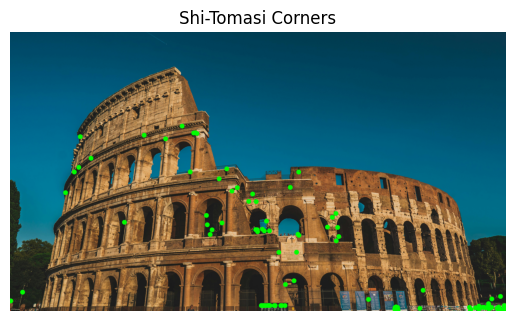

In [47]:
# Load the image and convert to grayscale
img = cv2.imread('img3.jpg')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

# Draw corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 29, (0, 255, 0), -1)

# Convert BGR to RGB for correct color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.title('Shi-Tomasi Corners')
plt.axis('off')
plt.show()